## HW 1: Math Foundation and Python Programming

 <div class="alert alert-block alert-warning">Each assignment needs to be completed independently. Never ever copy others' work (even with minor modification, e.g. changing variable names). Anti-Plagiarism software will be used to check all submissions. </div>

### Objectives: 

The objectives of this assignment include:
- Test your Python programming skills
- Program deep learning models from scrath
- Understand gradients, backpropagtion, and the impact of activation/loss functions on model performance
- Learn to analyze model performance analytically 

### Problem Description

- Suppose you have a two-layer deep learning model as shown below: 
    - $ L = g~(z^{(2)}, y)$, where $y$ is ground-truth, and $g$ is a loss function. 
    - $ z^{(2)} = \sigma~(~u^{(2)}~), ~ u^{(2)} = A^{(2)~T} z^{(1)} + b^{(2)},\text{where}  ~z^{(2)}, b^{(2)} \in R,~ z^{(1)},A^{(2)} \in R^3, ~\text{and} ~\sigma $ is the `sigmoid` activation function.
    - $ z^{(1)} = f ~(~u^{(1)}~),~ u^{(1)} = A^{(1)} x + b^{(1)}, \text{where}~x \in R^2, ~z^{(1)},~b^{(1)} \in R^3, A^{(1)}\in R^{3 \times 2}$, and $f$ is an activation function.
    
    
- Now, you have two options for $f$ and $g$:
    - $f$: `ReLU` or `tanh`
    - $g$: `cross_entropy` $L=-\frac{1}{N}\sum_i[~y_i*\ln{z^{(2)}_i}+(1-y_i)*ln~{(1-z^{(2)}_i)}~]$, or `mean squared error (mse)`, $L=\frac{1}{2N}\sum_i(y_i- z^{(2)}_i)^2$, where $i\in [1, 2, ..., N]$ are training instances.
    

<img src='hw1.png' width = '50%'>

Following the instruction below to program your solution in Python notebook step by step carefully.


In this assignment, `you don't need PyTorch. You only need to use Numpy Package`. The following are useful numpy functions: `np.dot`, `np.exp`, `np.tanh`, `np.squeeze`, `np.eye`, `np.zeros`, `np.expand_dims`, `np.fill_diagonal`. Do your search to figure out how to use these functions.


For the sake of convenience, in the code, we use `A1, A2, b1, b2, u1, u2, z1, z2` to denote $A^{(1)}, A^{(2)}, b^{(1)}, b^{(2)}, z^{(1)}, z^{(2)}$ respectively.

### Requirements

1. (2 points) Write a function to calculate each of the following partial derivatives. The inputs to the function are all the variables in the model and the returned derivatives are expressions of these variables. Pay attention to the shape of each gradient. An example is given below.

- $ \frac{d{L}}{du^{(2)}}$, a scalar
- $ \frac{\partial{u^{(2)}}}{\partial{z^{(1)}}} \in R^{1\times 3}$ 
- $ \frac{\partial{u^{(2)}}}{\partial{A^{(2)}}} \in R^{1\times 3}$
- $ \frac{\partial{u^{(2)}}}{\partial{b^{(2)}}}$, a sclar
- $ \frac{\partial{z^{(1)}}}{\partial{u^{(1)}}} \in R^{3\times 3}$
- $ \frac{\partial{u^{(1)}}}{\partial{A^{(1)}}} \in R^{3\times 3 \times 2}$
- $ \frac{\partial{u^{(1)}}}{\partial{b^{(1)}}} \in R^{3\times 3}$


In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def du1_dA1(u1, x, A1):
    
    # make Jacobian tensor with all 0s
    g = np.zeros(u1.shape + A1.shape)
    
    # set the gradient values
    for i, _ in enumerate(u1):
        g[i,i] = x
        
    return g


def dL_du2(L, y, u2, z2, fun = 'cross_entropy'):
    # dL/du2 = dL/dz2 * dz2/du2
    if fun == 'cross_entropy':
        return z2 - y
    elif fun == 'mse':
        return (-2*y+2*z2)*(z2-z2*z2)
    
def du2_dz1(A2):
    return np.transpose(A2)

def du2_dA2(u2, z1, A2):
    return z1

def du2_db2(u2, b2):
    mtx = np.zeros((1, 1))
    np.fill_diagonal(mtx,1)
    return mtx

def dz1_du1(z1, u1, fun = 'relu'):
    return (u1 >= 0)*1
    
    

def du1_db1(u1, b1):
    mtx = np.zeros((3, 3))
    np.fill_diagonal(mtx,1)
    return mtx

    

[[1.]]


2. (1 point) Write a function `forward(A1, A2, b1, b2, x, y, act_fun = 'relu', loss_fun = 'cross_entropy')`, which calculates `u1, z1, u2, z2`, and `loss` based on the provided model inputs and parameter values.

In [ ]:
def forward(A1, A2, b1, b2, x, y, act_fun = 'relu', loss_fun = 'cross_entropy'):
    
    u1, z1, u2, z2, loss  = None, None, None, None, None
    
                   
    return u1, z1, u2, z2, loss              

3. (2 point) Write a function `backpropagate(L, x, y, u1, u2, z1, z2, A1, A2, b1, b2, act_fun = 'relu', loss_fun = 'cross_entropy')` to compute the gradients $\frac{\partial{L}}{\partial{A^{(1)}}}, \frac{\partial{L}}{\partial{A^{(2)}}}, \frac{\partial{L}}{\partial{b^{(1)}}}, \frac{\partial{L}}{\partial{b^{(2)}}}$ using the functions defined in Q1. The inputs to this function are all the variables defined in the model and the chosen $f, g$ function names. This function return these 4 gradients.

In [ ]:
def backpropagate(L, x, y, u1, u2, z1, z2, \
                  A1, A2, b1, b2, \
                  act_fun = 'relu', \
                  loss_fun = 'cross_entropy'):
    
    g_A1, g_b1, g_A2, g_b2 = None, None, None, None
    
    # add your code
    
    return g_A1, g_b1, g_A2, g_b2

4. (0.5 point) Write a function `gradient_desc(v, g, lam)` to adjust a parameter value $v$ by its gradient $g$, i.e. return the new value of parameter $v = v - lam*g$, where `lam` is a given learning rate.


Note, The shape of your gradient may be different from that of $v$. Check the shapes of $v, g$ to make sure they are the same.

In [ ]:
def gradient_desc(v, g, lam):
    
    # add your code

5. (2 points) Write a function `train(x, y, A1, A2, b1, b2, lam = 0.001, act_fun = 'relu', loss_fun = 'cross_entropy', epoch = 100)`: as follows:
   1. Input arguments are:
        - Training sample $(x, y)$. For simplicity, let's assume there is *only one* training instance.
        - Initial parameter values $A1, A2, b1, b2$.
        - Learning rate `lam`, epochs, and the chosen function names for $f, g$
       
   1. Use a loop of `epoch` rounds to do the following:
       - Call the `forward` function to run a foward pass 
       - Call the `backpropagate` function to compute gradients $\frac{\partial{L}}{\partial{A^{(1)}}}, \frac{\partial{L}}{\partial{A^{(2)}}}, \frac{\partial{L}}{\partial{b^{(1)}}}, \frac{\partial{L}}{\partial{b^{(2)}}}$ 
       - Call the `gradient_desc` function to update parameters $A^{(1)}, A^{(2)}, b^{(1)}, b^{(2)}$
       
   1. Return of the loss and $z^{(2)}$ obtained in each epoch, and the final values of and the values of $A^{(1)}, A^{(2)}, b^{(1)}, b^{(2)}$.

In [22]:
def train(x, y, A1, A2, b1, b2, \
          lam = 0.001, act_fun = 'relu', \
          loss_fun = 'cross_entropy', \
          epoch = 100):
    
    loss_hist = []  # loss curve
    pred_hist = []  # prediction curve

    for i in range(epoch):
    
    # add your code
              
    return A1, b1, A2, b2, loss_hist, pred_hist

6. (0.5 point) Test your your `forward` and `backpropagate` functions as follows:
    - Initial parameter values and the training sample are set as follows: 
        - `A1 = [[-2,1],[2, -2],[-1, 5]], b1 = [3, -1, 2]`
        - `A2 = [1, -2, 2], b2 = 0`
        - `x = [0.465, 0.178], y = 0`
   
    - Call your `forward` and `backpropagate` functions under two cases:
        1. `act_fun = 'relu', loss_fun = 'cross_entropy'`
        1. `act_fun = 'tanh', loss_fun = 'mse'`
        
    - Carefully check the obtained `u1, z1, u2, z2, L` and the values of gradients $\frac{\partial{L}}{\partial{A^{(1)}}}, \frac{\partial{L}}{\partial{A^{(2)}}}, \frac{\partial{L}}{\partial{b^{(1)}}}, \frac{\partial{L}}{\partial{b^{(2)}}}$ to make sure they are correct.

In [23]:
A1 = np.array([[-2,1],[2, -2],[-1, 5]])
A2 = np.array([1, -2, 2])
b1 = np.array([3, -1, 2])
b2 = 0
x = np.array([0.465, 0.178])
y = 0

In [25]:
# Case A

act_fun = 'relu'
loss_fun = 'cross_entropy'

# Add your test code. The result should look like below


u1 :
 [ 2.248 -0.426  2.425]

z1 :
 [2.248 0.    2.425]

u2 :
 7.098

z2 :
 0.9991739261777141

loss :
 7.0988264152093095

gradient g_A1:
 [[[0.46461588 0.17785296]
  [0.         0.        ]
  [0.92923175 0.35570592]]]

gradient g_b1 :
 [[0.99917393 0.         1.99834785]]

gradient g_A2 :
 [[2.24614299 0.         2.42299677]]

gradient g_b2 :
 0.9991739261777141


In [1]:
# Test Case B

act_fun = 'tanh'
loss_fun = 'mse'

# Add your test code

7. (1 point) Put everything together: with the same initial parameter values and training instance as in Q6, train your model for 300 epochs with a learning rate of 0.01 under 4 cases:
    1. $f$ = `relu` and $g$ = `cross_entropy`
    1. $f$ = `relu` and $g$ = `mse`
    1. $f$ = `tanh` and $g$ = `cross_entropy`
    1. $f$ = `tanh` and $g$ = `mse`


Plot the loss and $z^{(2)}$ obtained in each epoch as a line chart. An example is shown below.

In [28]:
A1 = np.array([[-2,1],[2, -2],[-1, 5]])
A2 = np.array([1, -2, 2])
b1 = np.array([3, -1, 2])
b2 = 0
x = np.array([0.465, 0.178])
y = 0

act_fun = 'relu'
loss_fun = 'cross_entropy'
epoch = 300
lam = 0.01

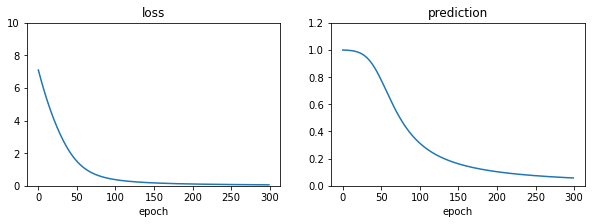

In [31]:
# Add your code

# Case A curve should look like below.

# Also show curve for the other cases


8. (1 point) Analysis: 
    - Comparing Case A and B (i.e., different loss functions), do you notice any significant difference in the loss and prediction curves? Can you explain this difference `analytically`? Hint: think about gradients under these two cases.
    - Comparing Case A and C (i.e., different activation functions), do you notice any significant difference in the loss and prediction curves? Can you explain this difference analytically? 
    - With your analysis, which functions would work the best for $f$ and $g$?
    

Write your analysis as markdowns in the Juypter Notebook. Please clearly demonstrate your analysis using formulas or experiment results.


9.(Bonus) So far we trained the model with a single sample. If you train the model using a batch of training samples, do you think the observations you had before still hold? 
- Rewrite the train function so that the model can be trained by a batch of samples.
- Train the model with the samples provided (`hw1_data.txt`; x: the first two columns, and y: the last column).
- You may need to adjust `epoch` and `learning rate`to prevent underfitting or overfitting
- Use plots to demonstrate your finding.

In [35]:
# Load training samples

data = np.loadtxt("hw1_data.txt")
data[0:2]

array([[0.93629975, 0.61317151, 1.        ],
       [0.46518579, 0.17846441, 0.        ]])